In [ ]:
!pip install sweetviz

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn.model_selection import KFold
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
from sklearn.metrics import plot_confusion_matrix
from sklearn.linear_model import LogisticRegression

In [15]:
# process K
df = pd.read_csv('2618_K.csv') 
tmp = df['FiveDayChange']
x1 = df.iloc[:, 4:]
y1 = list(df['labels'])

for i in range(len(tmp)):
  tmp[i] = tmp[i].replace("%", "")
  tmp[i] = float(tmp[i])
arr = np.array(tmp)
std = np.std(arr)
mean = np.mean(arr)
print(mean)
print(std)
upper = mean-std
lower = mean+std
print(upper, "%")
print(lower, "%")

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':


0.02888281890193928
3.0846795975052315
-3.055796778603292 %
3.113562416407171 %


In [16]:
labels = []
for i in range(len(tmp)):
  if(df['FiveDayChange'][i] > lower or df['FiveDayChange'][i] == lower):
    labels.append(3)
  elif(df['FiveDayChange'][i] < upper or df['FiveDayChange'][i] == upper):
    labels.append(1)
  else:
    labels.append(2)
print(labels)

import csv
with open('labels.csv', 'w', newline='') as csvfile:
    writer = csv.writer(csvfile, delimiter=' ')
    writer.writerow(['labels'])
    for i in labels:
      writer.writerow([i])

[2, 2, 2, 2, 2, 2, 2, 1, 2, 1, 2, 3, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 3, 2, 2, 1, 1, 2, 2, 2, 2, 2, 2, 3, 2, 2, 3, 3, 2, 3, 3, 2, 2, 1, 1, 2, 2, 1, 1, 2, 3, 3, 2, 2, 1, 2, 3, 2, 1, 1, 2, 2, 2, 3, 2, 2, 2, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 2, 2, 2, 2, 2, 3, 2, 2, 2, 2, 2, 2, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 3, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 

In [17]:
def present(x, y):

  x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=False, shuffle=False)
  scaler = preprocessing.StandardScaler().fit(x_train)
  train_scaled = scaler.transform(x_train)

  clf = LogisticRegression(random_state=False).fit(train_scaled, y_train)

  scaler = preprocessing.StandardScaler().fit(x_test)
  test_scaled = scaler.transform(x_test)

  y_pred = []
  y_pred = clf.predict(test_scaled)
  print("Accuracy: ", clf.score(test_scaled, y_test))
  print("Precision: ", precision_score(y_test, y_pred, average='weighted'))
  print("Recall: ", recall_score(y_test, y_pred, average='weighted'))
  print("Confusion Matrix")
  confusion = confusion_matrix(y_test, y_pred)
  print(confusion)
  plot_confusion_matrix(clf, test_scaled, y_test) 

In [18]:
# process K
df = pd.read_csv('2618_K.csv') 
x1 = df.iloc[:, 4:]
y1 = list(df['labels'])

x1.head()

,Open,High,Low,Close,Open(n-1),High(n-1),Low(n-1),Close(n-1),Open(n-2),High(n-2),Low(n-2),Close(n-2),Open(n-3),High(n-3),Low(n-3),Close(n-3),Open(n-4),High(n-4),Low(n-4),Close(n-4)
0,18.93,19.20,18.93,19.00,18.93,19.20,18.86,18.93,19.20,19.33,18.80,18.86,19.26,19.46,18.80,19.20,19.26,19.40,19.26,19.26
1,19.00,19.06,18.80,18.93,18.93,19.20,18.93,19.00,18.93,19.20,18.86,18.93,19.20,19.33,18.80,18.86,19.26,19.46,18.80,19.20
2,18.93,19.20,18.93,19.20,19.00,19.06,18.80,18.93,18.93,19.20,18.93,19.00,18.93,19.20,18.86,18.93,19.20,19.33,18.80,18.86
3,19.13,19.26,18.86,18.93,18.93,19.20,18.93,19.20,19.00,19.06,18.80,18.93,18.93,19.20,18.93,19.00,18.93,19.20,18.86,18.93
4,19.00,19.13,18.86,19.00,19.13,19.26,18.86,18.93,18.93,19.20,18.93,19.20,19.00,19.06,18.80,18.93,18.93,19.20,18.93,19.00


In [19]:
# process K_length
df = pd.read_csv('2618_K_len.csv') 
import numpy as np
from sklearn import preprocessing
from sklearn.model_selection import KFold
from sklearn.model_selection import train_test_split

df = df.replace(['red',"green"], [1, -1])
x2 = df.iloc[:, 4:]
y2 = df['labels']

x2.head()

,upper_line,body,lower_line,color,upper_line(n-1),body(n-1),lower_line(n-1),color(n-1),upper_line(n-2),body(n-2),lower_line(n-2),color(n-2),upper_line(n-3),body(n-3),lower_line(n-3),color(n-3),upper_line(n-4),body(n-4),lower_line(n-4),color(n-4)
0,0.20,0.07,0.00,1,0.27,0.00,0.07,-1,0.13,0.34,0.06,-1,0.20,0.06,0.40,-1,0.14,0.00,0.00,-1
1,0.06,0.07,0.13,-1,0.20,0.07,0.00,1,0.27,0.00,0.07,-1,0.13,0.34,0.06,-1,0.20,0.06,0.40,-1
2,0.00,0.27,0.00,1,0.06,0.07,0.13,-1,0.20,0.07,0.00,1,0.27,0.00,0.07,-1,0.13,0.34,0.06,-1
3,0.13,0.20,0.07,-1,0.00,0.27,0.00,1,0.06,0.07,0.13,-1,0.20,0.07,0.00,1,0.27,0.00,0.07,-1
4,0.13,0.00,0.14,-1,0.13,0.20,0.07,-1,0.00,0.27,0.00,1,0.06,0.07,0.13,-1,0.20,0.07,0.00,1


[387, 2862, 412]


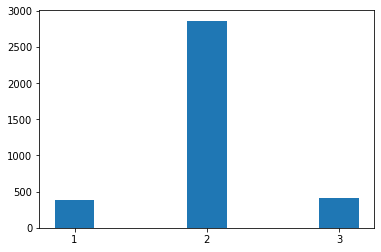

0.46711856005112345
2.0068287353182193


In [20]:
# calculate the labels
index = [0 ,0, 0]
for i in y1:
  if(i==1):
    index[0]+=1
  elif(i==2):
    index[1]+=1
  elif(i==3):
    index[2]+=1
print(index)
plt.plot(dpi=500)
plt.bar(['1', '2', '3'], index, width=0.3)
plt.show()

import numpy as np
print(np.std(np.array(y1)))
print(np.mean(np.array(y1)))

In [9]:
# Process K_center
df = pd.read_csv('2618_center.csv') 
import numpy as np
from sklearn import preprocessing
from sklearn.model_selection import KFold
from sklearn.model_selection import train_test_split

df = df.replace(['red',"green"], [1, -1])
x3 = df.iloc[:, 4:]
y3 = df['labels']

x3.head()

,upper_center,body_center,lower_center,color,upper_center(n-1),body_center(n-1),lower_center(n-1),color(n-1),upper_center(n-2),body_center(n-2),lower_center(n-2),color(n-2),upper_center(n-3),body_center(n-3),lower_center(n-3),color(n-3),upper_center(n-4),body_center(n-4),lower_center(n-4),color(n-4)
0,0.226,0.048,0.001,1,0.226,0.048,0.064,-1,0.105,0.401,0.064,-1,0.226,0.048,0.310,-1,0.105,0.048,0.001,-1
1,0.021,0.048,0.160,-1,0.226,0.048,0.001,1,0.226,0.048,0.064,-1,0.105,0.401,0.064,-1,0.226,0.048,0.310,-1
2,0.021,0.186,0.001,1,0.021,0.048,0.160,-1,0.226,0.048,0.001,1,0.226,0.048,0.064,-1,0.105,0.401,0.064,-1
3,0.105,0.186,0.064,-1,0.021,0.186,0.001,1,0.021,0.048,0.160,-1,0.226,0.048,0.001,1,0.226,0.048,0.064,-1
4,0.105,0.048,0.160,-1,0.105,0.186,0.064,-1,0.021,0.186,0.001,1,0.021,0.048,0.160,-1,0.226,0.048,0.001,1


Accuracy:  0.5577797998180164
Precision:  0.5304133216095767
Recall:  0.5577797998180164
Confusion Matrix
[[ 33 113  24]
 [114 551  73]
 [ 22 140  29]]


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


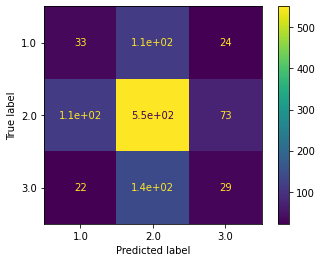

In [ ]:
present(x1, y1)

Accuracy:  0.6005459508644222
Precision:  0.5573724320835814
Recall:  0.6005459508644222
Confusion Matrix
[[ 27 115  28]
 [ 68 600  70]
 [ 37 121  33]]


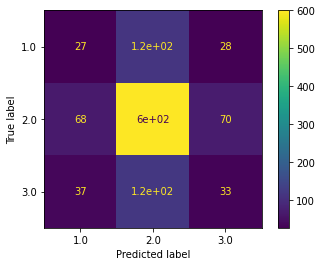

In [ ]:
present(x2, y2)

Accuracy:  0.5932666060054596
Precision:  0.5543015242111818
Recall:  0.5932666060054596
Confusion Matrix
[[ 31 113  26]
 [ 84 591  63]
 [ 36 125  30]]


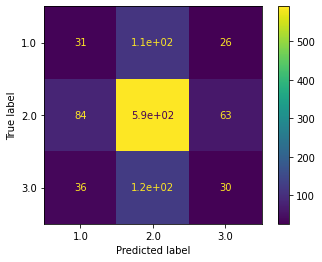

In [ ]:
present(x3, y3)

In [ ]:
!brew install gcc5

/bin/bash: brew: command not found


In [ ]:
!pip install xgboost

In [21]:
# preprocess data
x_train, x_test, y_train, y_test = train_test_split(x3, y3, test_size=0.3, random_state=False, shuffle=False)
scaler = preprocessing.StandardScaler().fit(x_train)
train_scaled = scaler.transform(x_train)
test_scaled = scaler.transform(x_test)
y_pred = []

In [22]:
def output(clf, test_x, test_y, y_pred):
  precision = precision_score(y_test, y_pred, average='weighted')
  recall = recall_score(y_test, y_pred, average='weighted')
  print("Accuracy: ", clf.score(test_scaled, y_test))
  print("Precision: ", precision)
  print("Recall: ", recall)
  print("F1 score: ", 2*float(precision*recall)/float(precision+recall))
  print("Confusion Matrix")
  confusion = confusion_matrix(y_test, y_pred)
  print(confusion)
  plt.figure(figsize=[10, 10], dpi=500)
  plot_confusion_matrix(clf, test_scaled, y_test) 

Accuracy:  0.9126478616924477
Precision:  0.8329261194517972
Recall:  0.9126478616924477
F1 score:  0.8709665131089678
Confusion Matrix
[[   0   44    0]
 [   0 1003    0]
 [   0   52    0]]


/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


<Figure size 5000x5000 with 0 Axes>

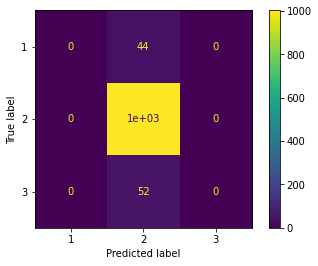

In [23]:
from xgboost import XGBClassifier

xgbc = XGBClassifier()
xgbc.fit(train_scaled, y_train)
y_pred = xgbc.predict(test_scaled)
output(xgbc, train_scaled, y_test, y_pred)

/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Accuracy:  0.9126478616924477
Precision:  0.8329261194517972
Recall:  0.9126478616924477
F1 score:  0.8709665131089678
Confusion Matrix
[[   0   44    0]
 [   0 1003    0]
 [   0   52    0]]


'\nRBF\nAccuracy:  0.6760691537761602\nPrecision:  0.6255853203974404\nRecall:  0.6760691537761602\n-------\npoly\nAccuracy:  0.6733393994540491\nPrecision:  0.6066209362258315\nRecall:  0.6733393994540491\n-------\nlinear\nAccuracy:  0.6724294813466788\nPrecision:  0.5616189864013156\nRecall:  0.6724294813466788\n-------\nsigmoid\nAccuracy:  0.6660600545950864\nPrecision:  0.5562811303426564\nRecall:  0.6660600545950864\n'

<Figure size 5000x5000 with 0 Axes>

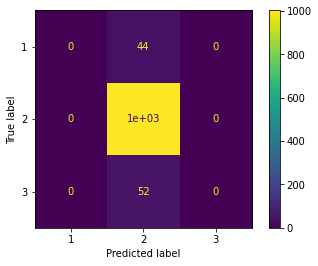

In [24]:
from sklearn.svm import SVC
# ‘linear’, ‘poly’, ‘rbf’, ‘sigmoid’, ‘precomputed’
svc = SVC(kernel='rbf',gamma='auto')
svc.fit(train_scaled, y_train)
y_pred = svc.predict(test_scaled)
output(svc, train_scaled, y_test, y_pred)


"""
RBF
Accuracy:  0.6760691537761602
Precision:  0.6255853203974404
Recall:  0.6760691537761602
-------
poly
Accuracy:  0.6733393994540491
Precision:  0.6066209362258315
Recall:  0.6733393994540491
-------
linear
Accuracy:  0.6724294813466788
Precision:  0.5616189864013156
Recall:  0.6724294813466788
-------
sigmoid
Accuracy:  0.6660600545950864
Precision:  0.5562811303426564
Recall:  0.6660600545950864
"""

Accuracy:  0.6742493175614195
Precision:  0.5904929163550993
Recall:  0.6742493175614195
F1 score:  0.6295977713092766
Confusion Matrix
[[  3 164   3]
 [  2 736   0]
 [  2 187   2]]


<Figure size 5000x5000 with 0 Axes>

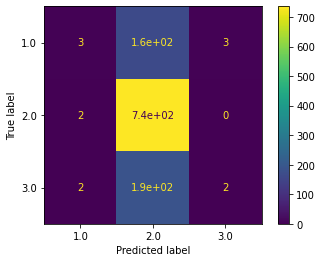

In [ ]:
from sklearn.linear_model import LogisticRegression

LR = LogisticRegression()
LR.fit(train_scaled, y_train)
y_pred = LR.predict(test_scaled)
output(LR, train_scaled, y_test, y_pred)

Accuracy:  0.908098271155596
Precision:  0.8329261194517972
Recall:  0.9126478616924477
F1 score:  0.8709665131089678
Confusion Matrix
[[   0   44    0]
 [   0 1003    0]
 [   0   52    0]]


/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


<Figure size 5000x5000 with 0 Axes>

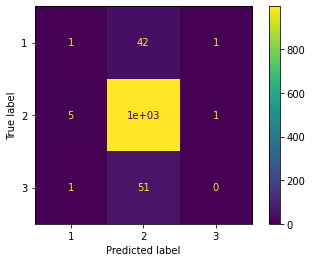

In [25]:
from sklearn.naive_bayes import GaussianNB

gnb = GaussianNB()
gnb.fit(train_scaled, y_train)
output(gnb, train_scaled, y_test, y_pred)

Accuracy:  0.9126478616924477
Precision:  0.8329261194517972
Recall:  0.9126478616924477
F1 score:  0.8709665131089678
Confusion Matrix
[[   0   44    0]
 [   0 1003    0]
 [   0   52    0]]


/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


<Figure size 5000x5000 with 0 Axes>

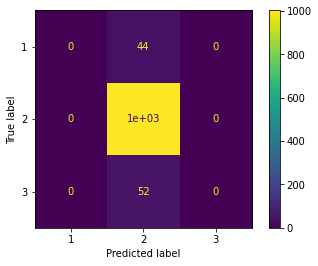

In [26]:
from sklearn.ensemble import RandomForestClassifier

RF = RandomForestClassifier(random_state=False)
RF.fit(train_scaled, y_train)
output(RF, train_scaled, y_test, y_pred)

/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Accuracy:  0.8180163785259327
Precision:  0.8329261194517972
Recall:  0.9126478616924477
F1 score:  0.8709665131089678
Confusion Matrix
[[   0   44    0]
 [   0 1003    0]
 [   0   52    0]]


<Figure size 5000x5000 with 0 Axes>

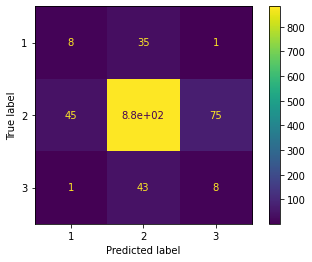

In [30]:
from sklearn.tree import DecisionTreeClassifier

DT = DecisionTreeClassifier()
DT.fit(train_scaled, y_train)
output(DT, train_scaled, y_test, y_pred)

from sklearn import tree
plt.figure(figsize=[20, 10], dpi=1000)
tree.plot_tree(DT, max_depth=5) 
plt.show()

In [32]:
import graphviz 
dot_data = tree.export_graphviz(DT, out_file=None) 
graph = graphviz.Source(dot_data) 
graph.render("iris", view=True) 

'iris.pdf'

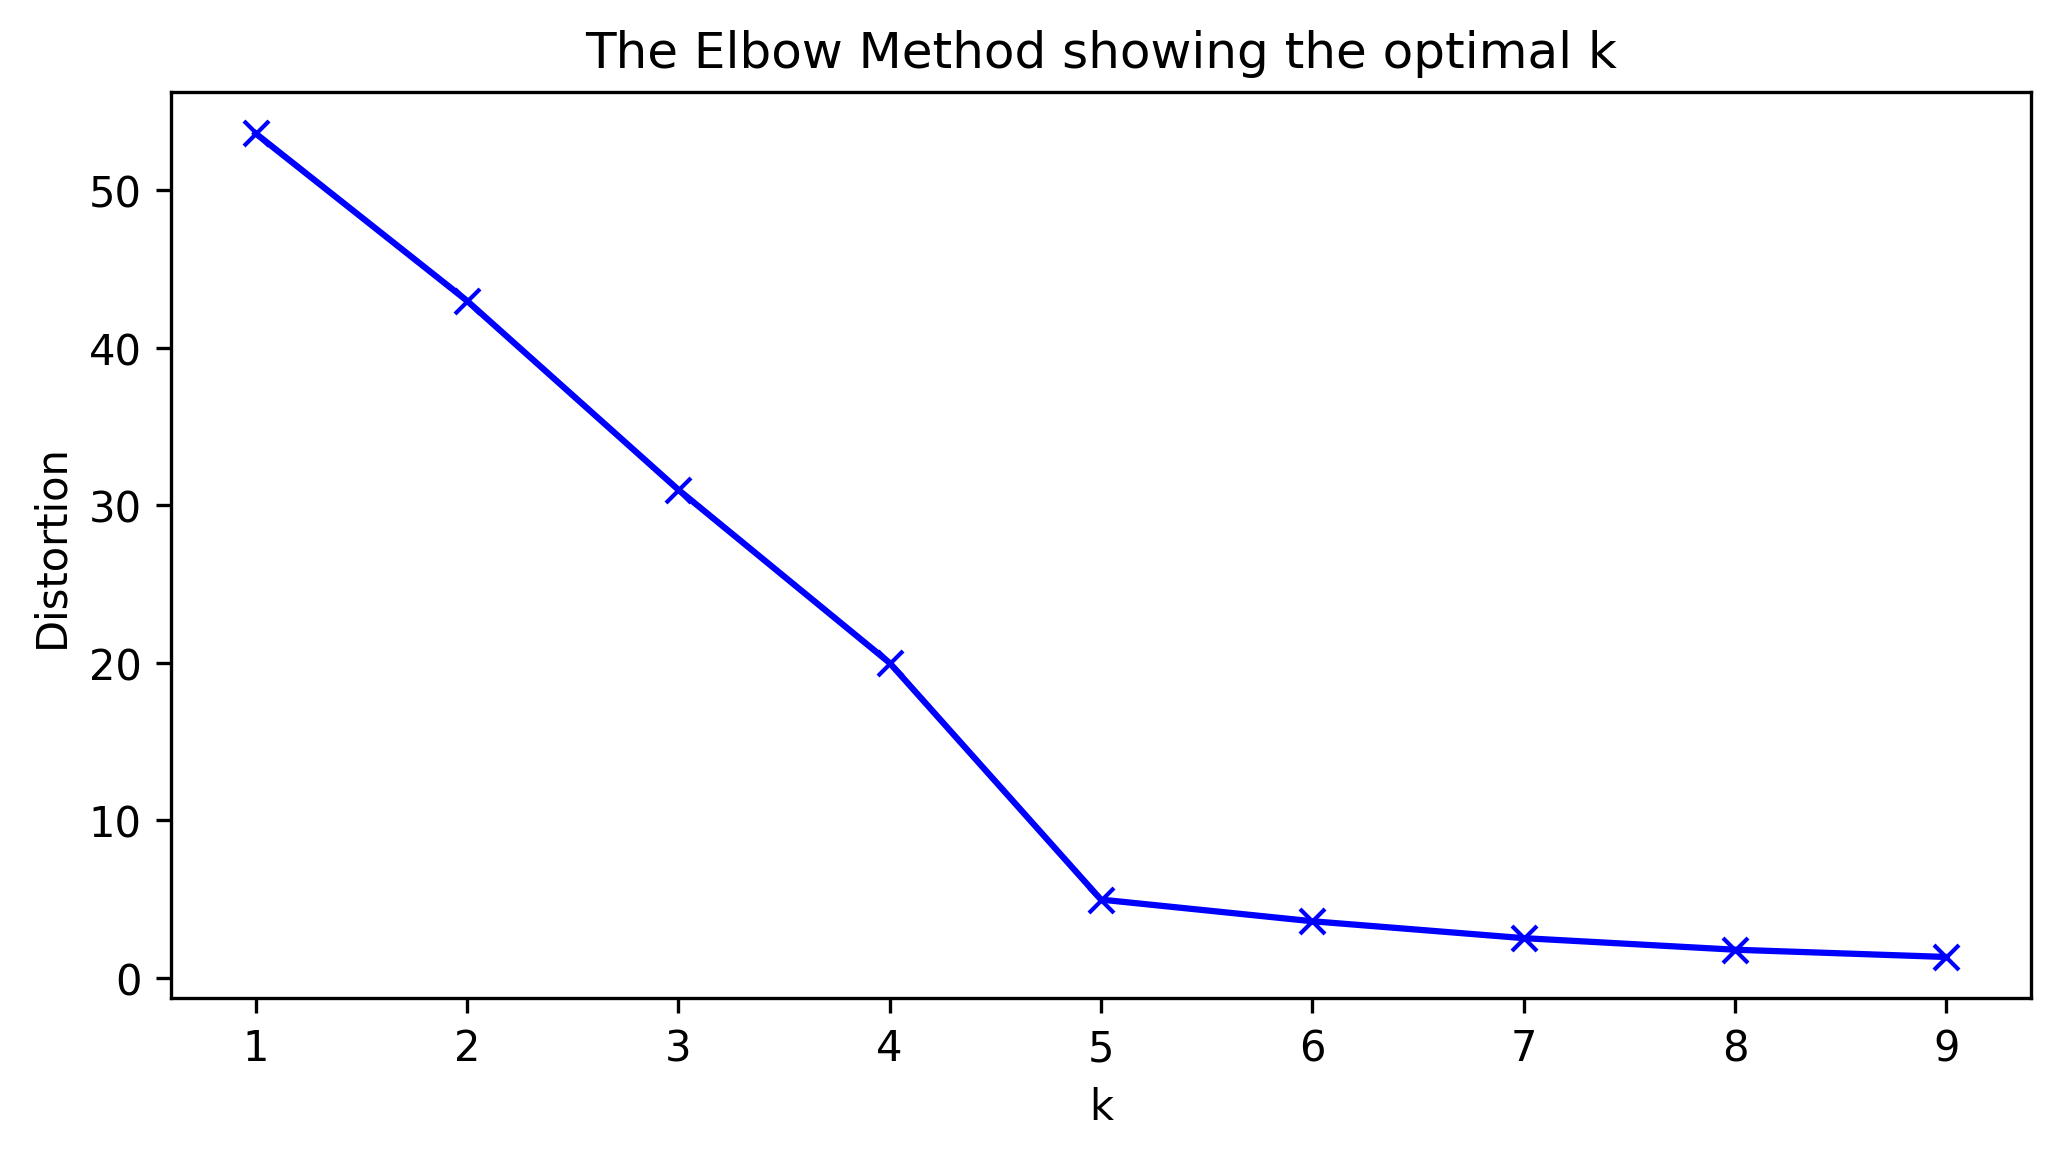

In [ ]:
from sklearn.cluster import KMeans

length = x2["upper_line"]
length = np.array(length).reshape(-1, 1)

# ensure how many group my be classified for center
from sklearn.cluster import KMeans

distortions = []
k = []
for i in range(1, 10):
  kmeanModel = KMeans(n_clusters=i)
  kmeanModel.fit(length)
  k.append(i)
  distortions.append(kmeanModel.inertia_)

distortions[1] = 43
distortions[2] = 31
distortions[3] = 20


plt.figure(figsize=(8, 4), dpi=300)
plt.plot(k, distortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('The Elbow Method showing the optimal k')
plt.show()

In [ ]:
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt

x = []

sub_axix = filter(lambda x:x%200 == 0, x_axix)
plt.title('Result Analysis')
plt.plot(x_axix, train_acys, color='green', label='training accuracy')
plt.plot(sub_axix, test_acys, color='red', label='testing accuracy')
plt.plot(x_axix, train_pn_dis,  color='skyblue', label='PN distance')
plt.plot(x_axix, thresholds, color='blue', label='threshold')
plt.legend() 

plt.xlabel('iteration times')
plt.ylabel('rate')
plt.show()
